<a href="https://colab.research.google.com/github/Supriyo-ux/DataScience-Analytics-R-Python/blob/master/CoronaVirus_text_analytics_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook aims at presenting EDA & Viz on Covid-19 tweets. The emphasis has been on the text (tweets) and its in-depth analysis for pre-processing. The modeling will be done in a separate notebook. This notebook is prepared on the Covid-19 tweets which are tagged manually from Highly Negative to Highly Positive 

In [4]:
import pandas as pd


In [5]:
train= pd.read_csv("Corona_NLP_train.csv",encoding='latin1')
test=pd.read_csv("Corona_NLP_test.csv",encoding='latin1')


In [6]:
data=pd.concat([train,test])

In [8]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [9]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
type(data.OriginalTweet)

pandas.core.series.Series

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44955 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [10]:
data['OriginalTweet']=data['OriginalTweet'].astype(str)
data['Sentiment']=data['Sentiment'].astype(str)

train['OriginalTweet']=train['OriginalTweet'].astype(str)
train['Sentiment']=train['Sentiment'].astype(str)

test['OriginalTweet']=test['OriginalTweet'].astype(str)
test['Sentiment']=test['Sentiment'].astype(str)

In [11]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44955 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [12]:
null= data.isnull().sum().sort_values(ascending=False)
null

Location         9424
Sentiment           0
OriginalTweet       0
TweetAt             0
ScreenName          0
UserName            0
dtype: int64

In [13]:
total= data.shape[0]

In [14]:
percent_missing=(data.isnull().sum()/total).sort_values(ascending=False)

In [15]:
missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

In [16]:
missing_data.reset_index(inplace=True)

In [17]:
missing_data.rename(columns={"index": " column name"})
print ("Null Values in each column:\n", missing_data)

Null Values in each column:
            index  Total missing  Percent missing
0       Location           9424         0.209632
1      Sentiment              0         0.000000
2  OriginalTweet              0         0.000000
3        TweetAt              0         0.000000
4     ScreenName              0         0.000000
5       UserName              0         0.000000


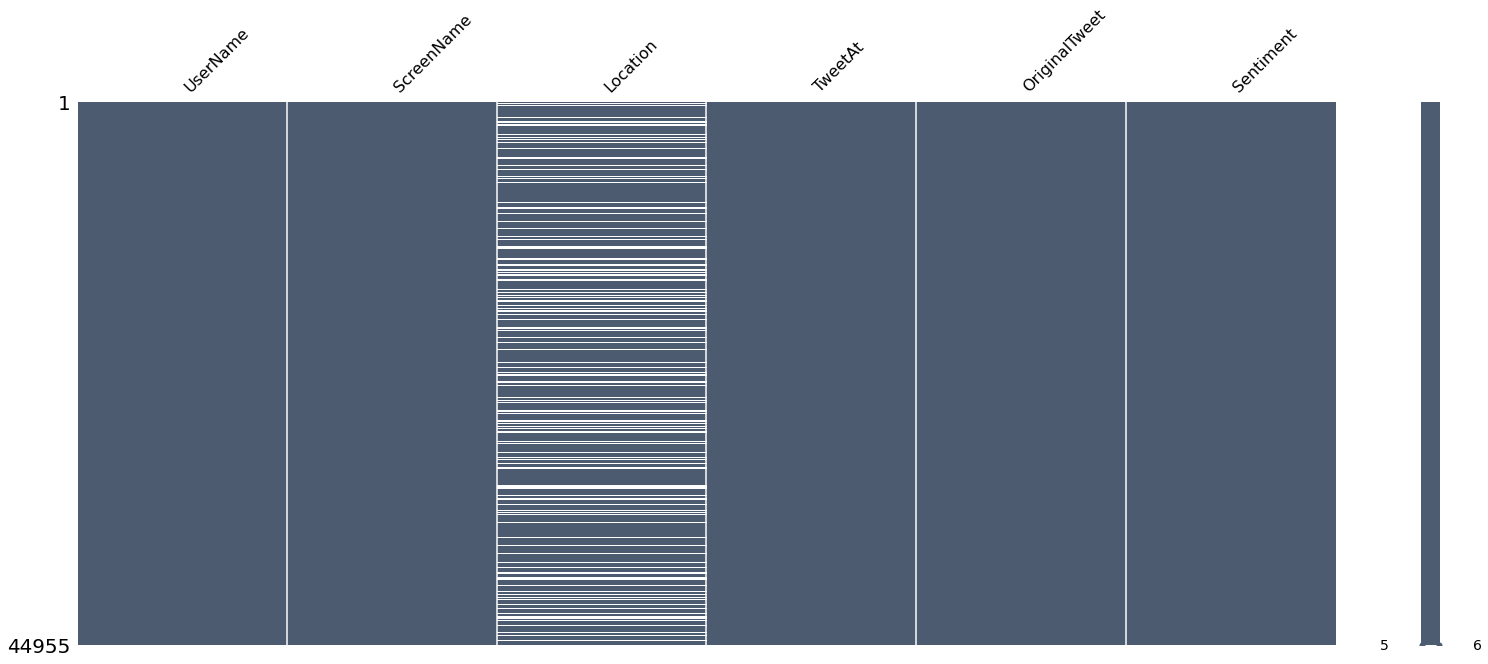

In [19]:
import missingno as msno
msno.matrix(data,color=(0.3,0.36,0.44))

In [20]:
# We will copy the text in another column so that the original text is also there for comparison

data['text'] = data.OriginalTweet
data["text"] = data["text"].astype(str)

train['text'] = train.OriginalTweet
train["text"] = train["text"].astype(str)

test['text'] = test.OriginalTweet
test["text"] = test["text"].astype(str)

# Data has 5 classes, let's convert them to 3
def classes_def(x):
    if x ==  "Extremely Positive":
        return "positive"
    elif x == "Extremely Negative":
        return "negative"
    elif x == "Negative":
        return "negative"
    elif x ==  "Positive":
        return "positive"
    else:
        return "neutral"
    
data['sentiment']=data['Sentiment'].apply(lambda x:classes_def(x))
train['sentiment']=train['Sentiment'].apply(lambda x:classes_def(x))
test['sentiment']=test['Sentiment'].apply(lambda x:classes_def(x))
target=data['sentiment']

data.sentiment.value_counts(normalize= True)


positive    0.435814
negative    0.378846
neutral     0.185341
Name: sentiment, dtype: float64

In [21]:
# Class Distribution
class_df = data.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
class_df.style.background_gradient(cmap='winter')

,sentiment,text
2,positive,19592
0,negative,17031
1,neutral,8332


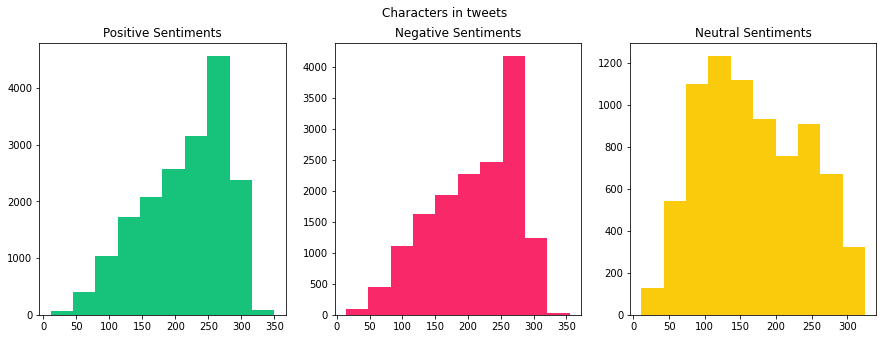

In [22]:
import matplotlib.pyplot as plt
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

tweet_len=train[train['sentiment']=="positive"]['text'].str.len()
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Positive Sentiments')

tweet_len=train[train['sentiment']=="negative"]['text'].str.len()
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentiments')

tweet_len=train[train['sentiment']=="neutral"]['text'].str.len()
ax3.hist(tweet_len,color='#FACA0C')
ax3.set_title('Neutral Sentiments')

fig.suptitle('Characters in tweets')
plt.show()

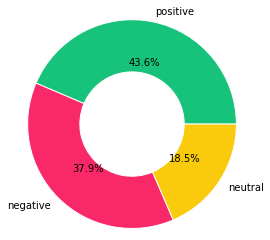

In [23]:
percent_class=class_df.text
labels= class_df.sentiment

colors = ['#17C37B','#F92969','#FACA0C']

my_pie,_,_ = plt.pie(percent_class,radius = 1.2,labels=labels,colors=colors,autopct="%.1f%%")

plt.setp(my_pie, width=0.6, edgecolor='white') 

plt.show()

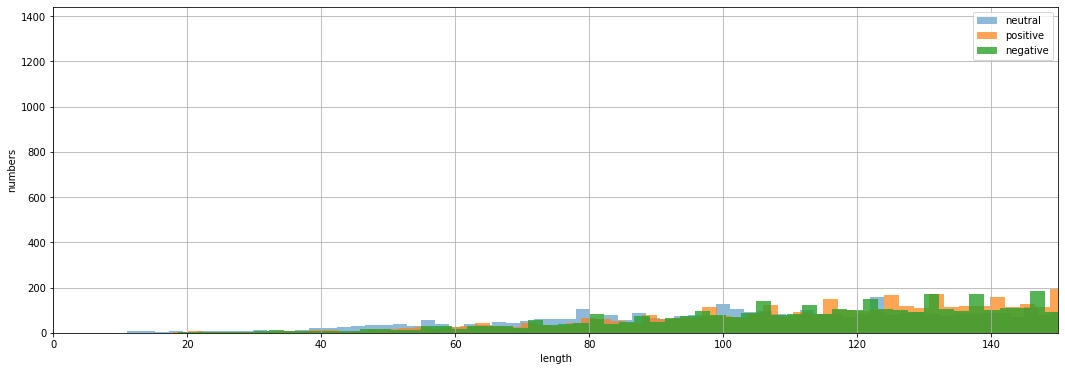

In [24]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)
data['length'] = data['text'].apply(length)


plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(data[data['sentiment'] == "neutral"]['length'], alpha = 0.5, bins=bins, label='neutral')
plt.hist(data[data['sentiment'] == "positive"]['length'], alpha = 0.7, bins=bins, label='positive')
plt.hist(data[data['sentiment'] == "negative"]['length'], alpha = 0.8, bins=bins, label='negative')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

In [25]:
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0.98, 'Average word length in each tweet')

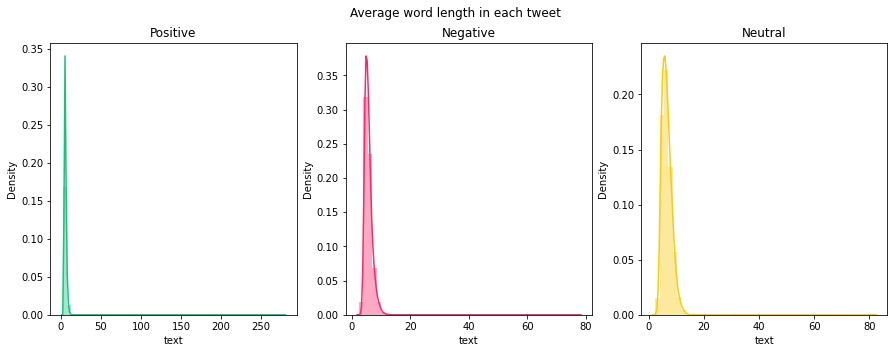

In [26]:
fig,(ax1,ax2, ax3)=plt.subplots(1,3,figsize=(15,5))

word=train[train['sentiment']=="positive"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='#17C37B')
ax1.set_title('Positive')


word=train[train['sentiment']=="negative"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='#F92969')
ax2.set_title('Negative')

word=train[train['sentiment']=="neutral"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='#FACA0C')
ax3.set_title('Neutral')


fig.suptitle('Average word length in each tweet')

In [27]:
#Common Stopwords in the tweets
def create_corpus(target):
    corpus=[]
    
    for x in train[train['sentiment']==target ]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [28]:
!pip install stop-words

In [29]:
import re
import gensim
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from collections import defaultdict,Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
nltk.download('stopwords')


stop=set(stopwords.words('english'))
plt.style.use('seaborn')


from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
#import plotly.graph_obj

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
from nltk.util import ngrams
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
np.array(stop)

array({'ours', 'through', 'any', 'a', 'then', 'mightn', 'how', 'them', 'doing', 'whom', 'i', 'own', 'for', 'd', 'above', 'too', 'didn', "haven't", 'hers', 'did', 'more', 'into', "wasn't", 'an', 'yours', 'weren', 'but', 'very', 'who', 'until', 'had', "she's", 'once', 's', 'while', 'o', 'those', 'both', "weren't", "hadn't", 'am', 'if', 'is', 'does', "needn't", 'having', 'off', "won't", 'hasn', 'than', 'was', 'haven', "shouldn't", 'be', 'aren', 'do', 'during', 'being', 'most', 'itself', 'shan', 'in', 'shouldn', 'you', 'here', 'can', 'from', 'couldn', 'so', 'some', 'the', 'wouldn', "it's", 'themselves', 'y', 'same', 'up', 'further', 'nor', 'over', 'mustn', 'won', 'as', 'only', "you'll", 'against', "that'll", 'between', 'their', "couldn't", 'needn', 'out', 'under', 'yourselves', 'my', "hasn't", 'he', 'what', 'don', "shan't", 'after', 'm', 'other', 'me', 'its', 'ourselves', 'to', "aren't", 'at', 'and', 'wasn', 'all', 'myself', 'have', 'yourself', 'ain', 'will', 'where', "you'd", "mustn't", '

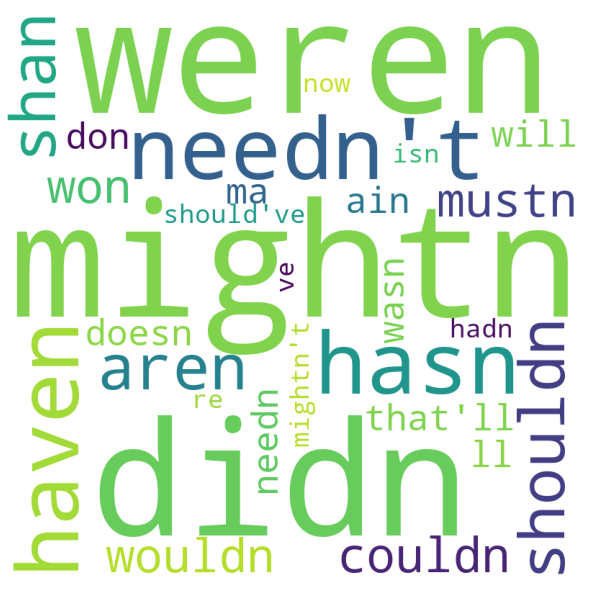

In [33]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  

for val in stop: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords = stopwords, 
                 min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "white") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<BarContainer object of 10 artists>

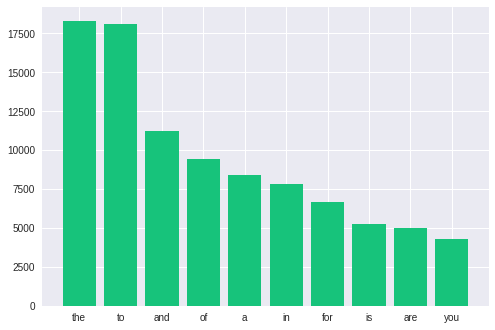

In [34]:
corpus=create_corpus("positive")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1     
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#17C37B')

In [35]:
print(dic)

defaultdict(<class 'int'>, {'to': 18097, 'your': 2587, 'with': 2872, 'of': 9430, 'up': 1496, 'if': 928, 'but': 1279, 'not': 1696, 'over': 457, 'is': 5249, 'the': 18285, 'only': 511, 'which': 342, "don't": 297, 'you': 4275, 'do': 927, 'more': 1372, 'than': 636, 'out': 1595, 'and': 11247, 'other': 671, 'at': 3359, 'was': 921, 'his': 282, 'on': 4041, 'he': 258, 'in': 7831, 'so': 1072, 'what': 811, 'our': 2201, 'will': 1959, 'be': 2620, 'for': 6693, 'or': 1634, 'as': 2393, 'we': 2116, 'have': 2713, 'all': 2030, 'during': 1423, 'this': 2839, 'a': 8412, 'after': 488, 'they': 1321, 'their': 1494, 'been': 750, 'who': 1161, 'just': 821, 'about': 1174, 'should': 563, 'has': 1570, 'those': 594, "aren't": 53, 'these': 596, 'from': 2308, 'yourself': 139, 'themselves': 78, 'some': 891, 'can': 1789, 'being': 490, 'here': 407, 'too': 206, 'that': 2770, 's': 793, 'own': 183, 're': 258, 'while': 382, 'now': 844, 'an': 1019, 'my': 1568, 'me': 644, 'into': 488, 'her': 244, 'she': 190, 'are': 4972, "it's":

<BarContainer object of 10 artists>

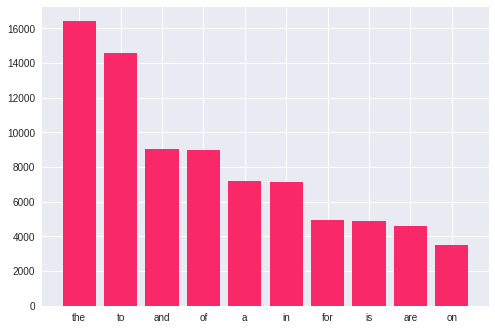

In [36]:
corpus=create_corpus("negative")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
          
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#F92969')

<BarContainer object of 10 artists>

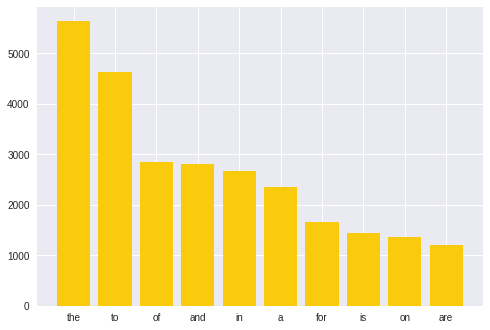

In [37]:
corpus=create_corpus("neutral")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
               
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#FACA0C')

In [38]:
print(top)

[('the', 5639), ('to', 4623), ('of', 2847), ('and', 2807), ('in', 2671), ('a', 2350), ('for', 1663), ('is', 1445), ('on', 1360), ('are', 1209)]


<BarContainer object of 27 artists>

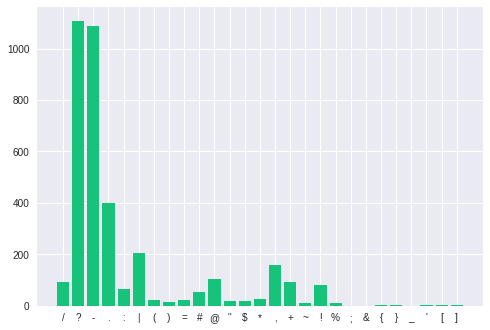

In [39]:
corpus=create_corpus("positive")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='#17C37B')

<BarContainer object of 25 artists>

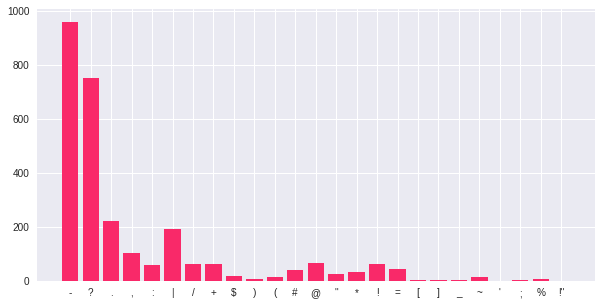

In [40]:
plt.figure(figsize=(10,5))
corpus=create_corpus("negative")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
                
x,y=zip(*dic.items())
plt.bar(x,y, color='#F92969')

<BarContainer object of 23 artists>

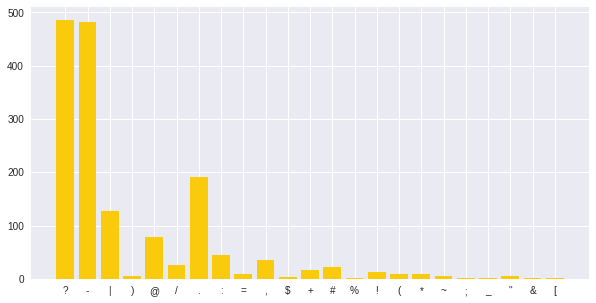

In [41]:
plt.figure(figsize=(10,5))
corpus=create_corpus("neutral")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

        
x,y=zip(*dic.items())
plt.bar(x,y,color='#FACA0C')

In [42]:
#Common Words
counter= Counter(corpus)
most= counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
  if (word not in stop):
        x.append(word)
        y.append(count)

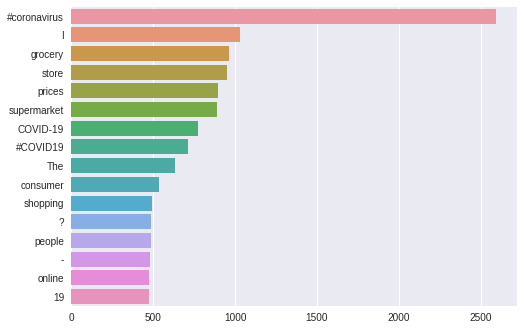

In [43]:
sns.barplot(x=y,y=x)

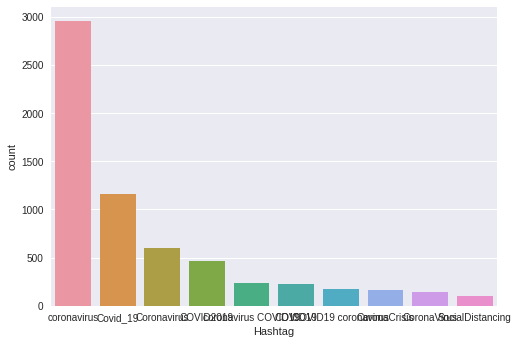

In [44]:
#Hashtags
def find_hash(text):
    line=re.findall(r'(?<=#)\w+',text)
    return " ".join(line)
data['hash']=data['text'].apply(lambda x:find_hash(x))
temp=data['hash'].value_counts()[:][1:11]
temp= temp.to_frame().reset_index().rename(columns={'index':'Hashtag','hash':'count'})
sns.barplot(x="Hashtag",y="count", data = temp)

In [45]:
print(temp)

               Hashtag  count
0          coronavirus   2956
1             Covid_19   1157
2          Coronavirus    598
3            COVID2019    470
4  coronavirus COVID19    234
5              COVID19    231
6  COVID19 coronavirus    171
7         CoronaCrisis    167
8          CoronaVirus    148
9     SocialDistancing    105


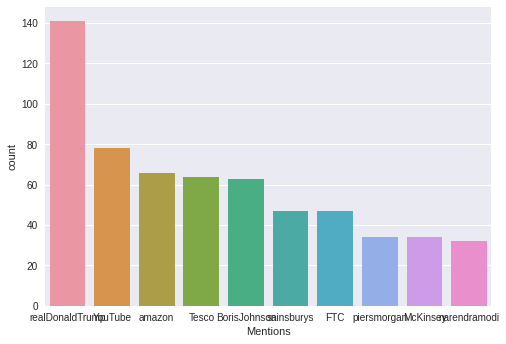

In [46]:
def mentions(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)
data['mentions']=data['text'].apply(lambda x:mentions(x))

temp=data['mentions'].value_counts()[:][1:11]
temp =temp.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})

sns.barplot(x="Mentions",y="count", data = temp)

In [47]:
import plotly.express as px

In [48]:
!pip install plotly --upgrade

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.13.0)


In [49]:
b = data['mentions'].value_counts()[:][1:11].index.tolist()
a = data['mentions'].value_counts()[:][1:11].tolist()
row = pd.DataFrame({'scenario' : []})
row["scenario"] = b
row["Percentage"] = a

fig= px.treemap(row,  values="Percentage",title='Tree of Mentions')
fig.show()

In [51]:
#Preprocessing
#Remove Urls and HTML links
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)
data['text_new']=data['text'].apply(lambda x:remove_urls(x))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
data['text']=data['text_new'].apply(lambda x:remove_html(x))

In [52]:
# Lower casing
def lower(text):
    low_text= text.lower()
    return low_text
data['text_new']=data['text'].apply(lambda x:lower(x))


# Number removal
def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove
data['text']=data['text_new'].apply(lambda x:remove_num(x))

In [53]:
#Remove stopwords & Punctuations
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

def punct_remove(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct
data['text_new']=data['text'].apply(lambda x:punct_remove(x))



def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text']=data['text_new'].apply(lambda x:remove_stopwords(x))

In [54]:
#Remove mentions and hashtags
def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text
data['text_new']=data['text'].apply(lambda x:remove_mention(x))
def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text
data['text']=data['text_new'].apply(lambda x:remove_hash(x))

In [55]:
#Remove extra white space left while removing stuff
def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove
data['text_new']=data['text'].apply(lambda x:remove_space(x))

data = data.drop(columns=['text_new'])

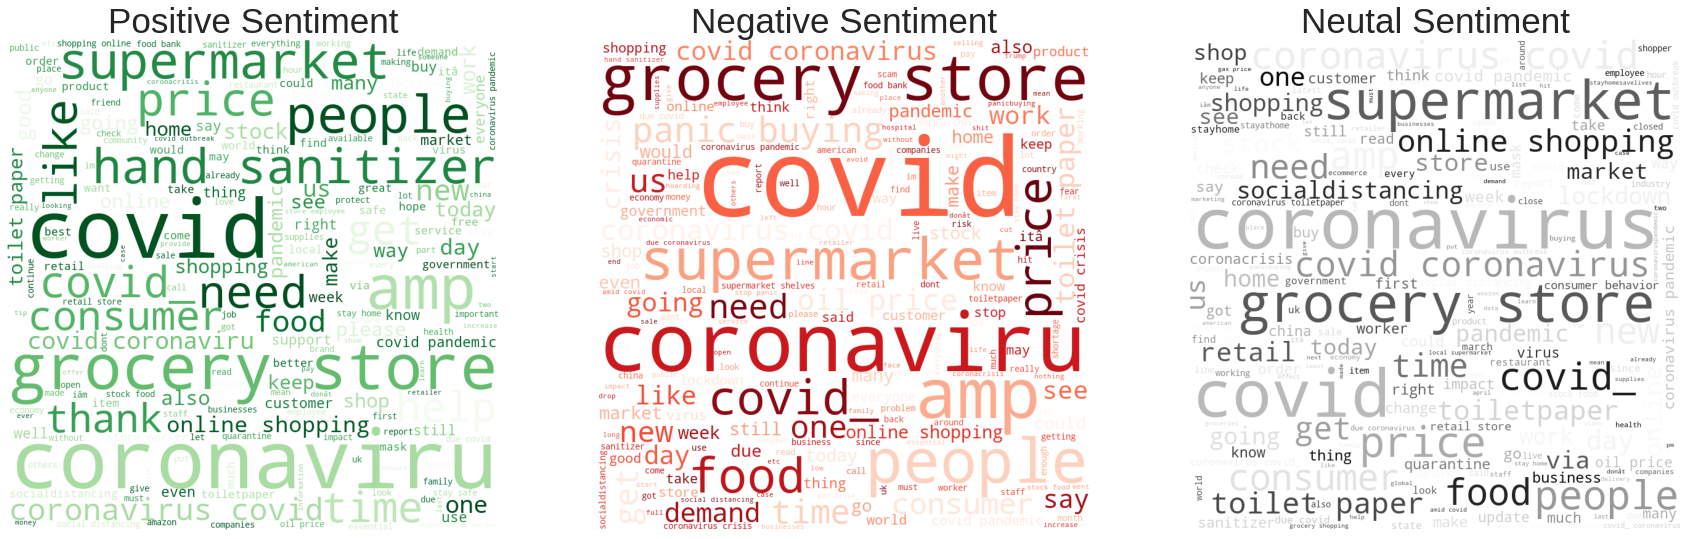

In [57]:
#Wordcloud
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])

df_pos = data[data["sentiment"]=="positive"]
df_neg = data[data["sentiment"]=="negative"]
df_neu = data[data["sentiment"]=="neutral"]

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df_pos.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
   

wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greens",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive Sentiment',fontsize=35);

comment_words = ''

for val in df_neg.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "




wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Reds",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)  
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative Sentiment',fontsize=35);



comment_words = ''
for val in df_neu.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud3 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greys",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutal Sentiment',fontsize=35);

In [61]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [62]:
#Using NLTK
text = "what is going to happen next in data science is a mystery what has happened is history it is an interdisciplinary field that uses scientific method processes algorithms and systems to extract knowledge and insights from many structural and unstructured data data science is related to data mining machine learning and big data"
txt = nltk.sent_tokenize(text)

word2count = {} 
for data in txt: 
    words = nltk.word_tokenize(data) 
    for word in words: 
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1

print(word2count)

{'what': 2, 'is': 5, 'going': 1, 'to': 3, 'happen': 1, 'next': 1, 'in': 1, 'data': 5, 'science': 2, 'a': 1, 'mystery': 1, 'has': 1, 'happened': 1, 'history': 1, 'it': 1, 'an': 1, 'interdisciplinary': 1, 'field': 1, 'that': 1, 'uses': 1, 'scientific': 1, 'method': 1, 'processes': 1, 'algorithms': 1, 'and': 4, 'systems': 1, 'extract': 1, 'knowledge': 1, 'insights': 1, 'from': 1, 'many': 1, 'structural': 1, 'unstructured': 1, 'related': 1, 'mining': 1, 'machine': 1, 'learning': 1, 'big': 1}


In [63]:
import heapq 
freq_words = heapq.nlargest(200, word2count, key=word2count.get)
freq_words

['is',
 'data',
 'and',
 'to',
 'what',
 'science',
 'going',
 'happen',
 'next',
 'in',
 'a',
 'mystery',
 'has',
 'happened',
 'history',
 'it',
 'an',
 'interdisciplinary',
 'field',
 'that',
 'uses',
 'scientific',
 'method',
 'processes',
 'algorithms',
 'systems',
 'extract',
 'knowledge',
 'insights',
 'from',
 'many',
 'structural',
 'unstructured',
 'related',
 'mining',
 'machine',
 'learning',
 'big']

In [64]:
X = [] 
for data in txt: 
    vector = [] 
    for word in freq_words: 
        if word in nltk.word_tokenize(data): 
            vector.append(1) 
        else: 
            vector.append(0) 
    X.append(vector) 
X = np.asarray(X)
X

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [65]:
length(X)

1

In [67]:
X.shape

(1, 38)

In [68]:
#Using SkLearn
text = "Natural Language Processing (NLP) is a sub-field of artificial intelligence that deals understanding and processing human language. In light of new advancements in machine learning, many organizations have begun applying natural language processing for translation, chatbots and candidate filtering"

count_vec = CountVectorizer()
count_occurs = count_vec.fit_transform([text])
count_occur_df = pd.DataFrame((count, word) for word, count in zip(count_occurs.toarray().tolist()[0], count_vec.get_feature_names()))
count_occur_df.columns = ['Word', 'Count']
count_occur_df.sort_values('Count', ascending=False, inplace=True)
count_occur_df.head()

,Word,Count
16,language,3
26,processing,3
21,natural,2
1,and,2
13,in,2


In [69]:
count_occurs


<1x31 sparse matrix of type '<class 'numpy.int64'>'
	with 31 stored elements in Compressed Sparse Row format>

In [71]:
count_occur_df.sort_values('Count', ascending=False, inplace=True)
count_occur_df

,Word,Count
16,language,3
26,processing,3
21,natural,2
1,and,2
13,in,2
24,of,2
17,learning,1
23,nlp,1
28,that,1
27,sub,1
